In [12]:
#### 4B17 Week 3 tutorial – 3D Rotations

from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
import mpl_toolkits.mplot3d as plt3d

Q1 answer: [120.96003366   9.          36.57634701]


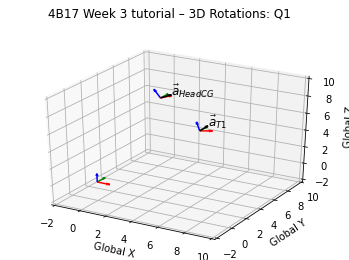

In [13]:
############## Q1 ##############

# Where in the lecture notes is this??

# Figure out the right hand rule

def RotationY(θy):
    """ Calculate a rotation matrix for a rotation about the Y axis"""
    ROTMy = np.array([[np.cos(θy),0,np.sin(θy)],
                     [0,1,0],
                     [-np.sin(θy),0,np.cos(θy)]])
    return ROTMy

fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
fig.suptitle('4B17 Week 3 tutorial – 3D Rotations: Q1', fontsize=12)

# Plot the global coordinate system
dirxglobal=[1,0,0]
diryglobal=[0,1,0]
dirzglobal=[0,0,1]

ax.quiver(0,0,0,dirxglobal[0],dirxglobal[1],dirxglobal[2],color='r')
ax.quiver(0,0,0,diryglobal[0],diryglobal[1],diryglobal[2],color='g')
ax.quiver(0,0,0,dirzglobal[0],dirzglobal[1],dirzglobal[2],color='b')


# Plot T1
aT1_pos = np.array([5,5,5])
T1_local = RotationY(np.radians(-15)) @ np.array([[1,0,0],[0,1,0],[0,0,1]])

dirxlocal=T1_local @ [1,0,0]
dirylocal=T1_local @ [0,1,0]
dirzlocal=T1_local @ [0,0,1]

ax.quiver(aT1_pos[0],aT1_pos[1],aT1_pos[2],dirxlocal[0],dirxlocal[1],dirxlocal[2],color='r')
ax.quiver(aT1_pos[0],aT1_pos[1],aT1_pos[2],dirylocal[0],dirylocal[1],dirylocal[2],color='g')
ax.quiver(aT1_pos[0],aT1_pos[1],aT1_pos[2],dirzlocal[0],dirzlocal[1],dirzlocal[2],color='b')

aT1_global=T1_local @ np.array([110,-4,80])
aT1_hat = aT1_global / np.linalg.norm(aT1_global)

ax.quiver(aT1_pos[0],aT1_pos[1],aT1_pos[2],aT1_hat[0],aT1_hat[1],aT1_hat[2],color='black')
ax.text(aT1_pos[0]+aT1_hat[0],aT1_pos[1]+aT1_hat[1],aT1_pos[2]+aT1_hat[2],  '%s' % (r'$\vec a_{T1}$'), size=12, zorder=1,color='black')

# Plot HeadCG
aheadCG_pos = np.array([2,5,8])
headCG_local = RotationY(np.radians(-30)) @ np.array([[1,0,0],[0,1,0],[0,0,1]]) # RENAME

dirxlocal=headCG_local @ [1,0,0]
dirylocal=headCG_local @ [0,1,0]
dirzlocal=headCG_local @ [0,0,1]

ax.quiver(aheadCG_pos[0],aheadCG_pos[1],aheadCG_pos[2],dirxlocal[0],dirxlocal[1],dirxlocal[2],color='r')
ax.quiver(aheadCG_pos[0],aheadCG_pos[1],aheadCG_pos[2],dirylocal[0],dirylocal[1],dirylocal[2],color='g')
ax.quiver(aheadCG_pos[0],aheadCG_pos[1],aheadCG_pos[2],dirzlocal[0],dirzlocal[1],dirzlocal[2],color='b')

aheadCG_global=headCG_local @ np.array([250,5,20])
aheadCG_hat = aheadCG_global / np.linalg.norm(aheadCG_global)

ax.quiver(aheadCG_pos[0],aheadCG_pos[1],aheadCG_pos[2],aheadCG_hat[0],aheadCG_hat[1],aheadCG_hat[2],color='black')
ax.text(aheadCG_pos[0]+aheadCG_hat[0],aheadCG_pos[1]+aheadCG_hat[1],aheadCG_pos[2]+aheadCG_hat[2],  '%s' % (r'$\vec a_{HeadCG}$'), size=12, zorder=1,color='black')

# Axis limits and lables
ax.set_xlim3d(-2,10)
ax.set_ylim3d(-2,10)
ax.set_zlim3d(-2,10)

ax.set_xlabel('Global X')
ax.set_ylabel('Global Y')
ax.set_zlabel('Global Z')


# Compute relative acceleration head CG and T1

a_rel_global = aheadCG_global - aT1_global

print('Q1 answer:', a_rel_global)


plt.show()

In [14]:
############## Q2 ##############

# Where in the lecture notes is this??

def Screw(ROTM):
    """ Calculate the screw angle and axis for a given rotation matrix"""
    n=[]
    θ = np.arccos((np.trace(ROTM)-1)/2)
    n.append(np.array(ROTM[1][2]-ROTM[2][1])/(2*np.sin(θ)))
    n.append(np.array(ROTM[2][0]-ROTM[0][2])/(2*np.sin(θ)))
    n.append(np.array(ROTM[0][1]-ROTM[1][0])/(2*np.sin(θ)))
    return θ, n

# Aside: Screw axes and angles from Q1
θ,n = Screw(headCG_local)
print('headCG_local: screw angle = ', np.degrees(θ), 'screw axis = ',n)
θ,n = Screw(T1_local)
print('T1_local: screw angle = ', np.degrees(θ), 'screw axis = ',n)

A21 = np.array([[0.3584,0.8613,-0.3603],[-0.6638,0.5064,0.5503],[0.6564,0.0420,0.7532]])
θ,n = Screw(A21)
print('Q2 answer: screw angle = ', np.degrees(θ), 'screw axis = ',n) # why is it minus??

# ADD PLOT

headCG_local: screw angle =  29.99999999999998 screw axis =  [0.0, 1.0000000000000007, 0.0]
T1_local: screw angle =  15.000000000000018 screw axis =  [0.0, 0.9999999999999987, 0.0]
Q2 answer: screw angle =  72.00102381206236 screw axis =  [0.2672275728216174, 0.5345077184492197, 0.8017878640768221]


In [15]:
############## Q3 ##############

# Where in the lecture notes is this??

def EulRod(ROTM):
    """ Find the Euler-Rodrigues parameters associated with a rotation matrix"""
    q=[]
    q.append((1/2)*sqrt(1+(np.trace(ROTM))))
    q.append(np.array(ROTM[1][2]-ROTM[2][1])/(4*q[0]))
    q.append(np.array(ROTM[2][0]-ROTM[0][2])/(4*q[0]))
    q.append(np.array(ROTM[0][1]-ROTM[1][0])/(4*q[0]))
    return q

A21 = np.array([[0.3584,0.8613,-0.3603],[-0.6638,0.5064,0.5503],[0.6564,0.0420,0.7532]])
q=EulRod(A21)
print('Q3 answer:', q)

Q3 answer: [0.8090117428072351, 0.15707435785672944, 0.31417961761348967, 0.47128487737024993]


Q5 a) answer: [[ 0.61237244  0.35355339 -0.70710678]
 [-0.5         0.8660254   0.        ]
 [ 0.61237244  0.35355339  0.70710678]]
Q5 b) answer: [0.12022704 0.0463191  0.18585786]


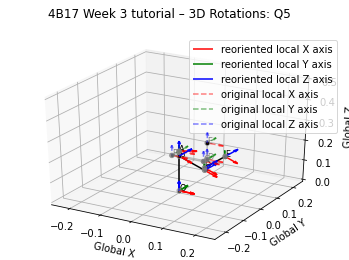

In [16]:
############## Q5 ##############

# Necessary functions

def jnt_path(graph, start, end, path=[]):
    path = path + [start]
    if start == end:
        return path
    if not start in graph:
        return None
    for node in graph[start]:
        if node not in path:
            newpath = jnt_path(graph, node, end, path)
            if newpath: return newpath
    return None

def takeSecond(elem): 
    return elem[1]

def parent_child(graph):
    parent_child_pairs = []
    for i in range(max(graph[max(graph)])+1):
        for j in range(max(graph[max(graph)])+1):
            pair = jnt_path(dir_graph, i, j)
            if pair != None: 
                if len(pair)==2:
                    parent_child_pairs.append(pair)
    parent_child_pairs.sort(key=takeSecond)
    return parent_child_pairs


def FK_local2global(chain,dir_graph): 
    """ perform forward kinematics to to convert joint orientations and position vectors into the global coordinate system"""
    ref_space_ori = np.array([[1, 0, 0],
                              [0, 1, 0],
                              [0, 0, 1]])
    ref_space_pos = np.array([0, 0, 0])
    oris=[]
    poss=[]
    for i in range (len(chain)):
        path = jnt_path(dir_graph, 0, i)
        ori = ref_space_ori
        pos = ref_space_pos
        for j in path:
            pos=pos + ori @ chain[j][2]
            ori=ori @ chain[j][1]
        oris.append(ori)
        poss.append(pos)
    
    return oris, poss

def RotationY(θy):
    """ Calculate a rotation matrix for a rotation about the Y axis"""
    ROTMy = np.array([[np.cos(θy),0,np.sin(θy)],
                     [0,1,0],
                     [-np.sin(θy),0,np.cos(θy)]])
    return ROTMy

def RotationZ(θz):
    """ Calculate a rotation matrix for a rotation about the Z axis"""
    ROTMy = np.array([[np.cos(θz),-np.sin(θz),0],
                     [np.sin(θz),np.cos(θz),0],
                     [0,0,1]])
    return ROTMy

# Define the Kinematic chain using local orientations (relative to parent) as 3x3 rotation matrices, and local position offset vectors (position of child relative to parent)
chain=[]

chain.append(['O', np.array([[ 1, 0, 0],
                                 [ 0, 1, 0],
                                 [ 0, 0, 1]]),
                          np.array([0,0,0])])
chain.append(['A', np.array([[ 1, 0, 0],
                                 [ 0, 1, 0],
                                 [ 0, 0, 1]]),
                          np.array([0,0,0.2])])
chain.append(['B', np.array([[ 1, 0, 0],
                                 [ 0, 1, 0],
                                 [ 0, 0, 1]]),
                          np.array([0,-0.04,0])])
chain.append(['C', np.array([[ 1, 0, 0],
                                 [ 0, 1, 0],
                                 [ 0, 0, 1]]),
                          np.array([0.1,0,0])])
chain.append(['D', np.array([[ 1, 0, 0],
                                 [ 0, 1, 0],
                                 [ 0, 0, 1]]),
                          np.array([0,0.02,0])])
chain.append(['E', np.array([[ 1, 0, 0],
                                 [ 0, 1, 0],
                                 [ 0, 0, 1]]),
                          np.array([0,0,0.08])])

# a directed graph with parent/child relationship knowledge is needed for constructing the kinematic chain
dir_graph = {0: [1],
             1: [2],
             2: [3],
             3: [4],
             4: [5]}

# find parent/child pairs from the directed graph
parent_child_pairs=parent_child(dir_graph)

# apply forward kinematics
ori, pos = FK_local2global(chain,dir_graph)

# Plot the kinematic chain
fig = plt.figure(5)
ax = fig.add_subplot(111, projection='3d')
fig.suptitle('4B17 Week 3 tutorial – 3D Rotations: Q5', fontsize=12)

dirxlocal=[1,0,0]
dirylocal=[0,1,0]
dirzlocal=[0,0,1]

ax.quiver(0,0,0,dirxlocal[0],dirxlocal[1],dirxlocal[2],length=0.05,color='r',label='reoriented local X axis')
ax.quiver(0,0,0,dirylocal[0],dirylocal[1],dirylocal[2],length=0.05,color='g',label='reoriented local Y axis')
ax.quiver(0,0,0,dirzlocal[0],dirzlocal[1],dirzlocal[2],length=0.05,color='b',label='reoriented local Z axis')

ax.quiver(0,0,0,dirxlocal[0],dirxlocal[1],dirxlocal[2],length=0.05,color='r',label='original local X axis',linestyle='--', alpha=0.5)
ax.quiver(0,0,0,dirylocal[0],dirylocal[1],dirylocal[2],length=0.05,color='g',label='original local Y axis',linestyle='--', alpha=0.5)
ax.quiver(0,0,0,dirzlocal[0],dirzlocal[1],dirzlocal[2],length=0.05,color='b',label='original local Z axis',linestyle='--', alpha=0.5)

ax.legend()

x=[]
y=[]
z=[]
for i in range(len(pos)):
    x.append(pos[i][0])
    y.append(pos[i][1])
    z.append(pos[i][2])
    
    dirxlocal=ori[i]@[1,0,0]
    dirylocal=ori[i]@[0,1,0]
    dirzlocal=ori[i]@[0,0,1]

    ax.quiver(x[i],y[i],z[i],dirxlocal[0],dirxlocal[1],dirxlocal[2],length=0.05,color='r',linestyle='--', alpha=0.5)
    ax.quiver(x[i],y[i],z[i],dirylocal[0],dirylocal[1],dirylocal[2],length=0.05,color='g',linestyle='--', alpha=0.5)
    ax.quiver(x[i],y[i],z[i],dirzlocal[0],dirzlocal[1],dirzlocal[2],length=0.05,color='b',linestyle='--', alpha=0.5)
ax.scatter(x, y, z, c=['gray']*len(chain), marker='o')

for i in range(len(chain)):
    ax.scatter(x[i], y[i], z[i], c='black', marker='.')
    ax.text(x[i], y[i], z[i],  '%s' % (str(chain[i][0])), size=8, zorder=1,color='gray')

for j in range(len(parent_child_pairs)):
    xs = [x[parent_child_pairs[j][0]],x[parent_child_pairs[j][1]]]
    ys = [y[parent_child_pairs[j][0]],y[parent_child_pairs[j][1]]]
    zs = [z[parent_child_pairs[j][0]],z[parent_child_pairs[j][1]]]
    
    line = plt3d.art3d.Line3D(xs, ys, zs, c='gray',alpha=0.5)
    ax.add_line(line)


# apply rotations to the robot
θ1 = 30
θ2 = 45
θ3 = 0

chain[1][1]=RotationZ(np.radians(θ1)) @ chain[1][1]
chain[2][1]=RotationY(np.radians(θ2)) @ chain[2][1]
chain[4][1]=RotationY(np.radians(θ3)) @ chain[4][1]

# apply forward kinematics
ori, pos = FK_local2global(chain,dir_graph)

x=[]
y=[]
z=[]
for i in range(len(pos)):
    x.append(pos[i][0])
    y.append(pos[i][1])
    z.append(pos[i][2])
    
    dirxlocal=ori[i]@[1,0,0]
    dirylocal=ori[i]@[0,1,0]
    dirzlocal=ori[i]@[0,0,1]

    ax.quiver(x[i],y[i],z[i],dirxlocal[0],dirxlocal[1],dirxlocal[2],length=0.05,color='r')
    ax.quiver(x[i],y[i],z[i],dirylocal[0],dirylocal[1],dirylocal[2],length=0.05,color='g')
    ax.quiver(x[i],y[i],z[i],dirzlocal[0],dirzlocal[1],dirzlocal[2],length=0.05,color='b')
ax.scatter(x, y, z, c=['gray']*len(chain), marker='o')

for i in range(len(chain)):
    ax.scatter(x[i], y[i], z[i], c='black', marker='.')
    ax.text(x[i], y[i], z[i],  '%s' % (str(chain[i][0])), size=8, zorder=1,color='black')

for j in range(len(parent_child_pairs)):
    xs = [x[parent_child_pairs[j][0]],x[parent_child_pairs[j][1]]]
    ys = [y[parent_child_pairs[j][0]],y[parent_child_pairs[j][1]]]
    zs = [z[parent_child_pairs[j][0]],z[parent_child_pairs[j][1]]]
    
    line = plt3d.art3d.Line3D(xs, ys, zs, c='black')
    ax.add_line(line)


# Axis limits and lables
ax.set_xlim3d(-0.25,0.25)
ax.set_ylim3d(-0.25,0.25)
ax.set_zlim3d(0,0.5)

ax.set_xlabel('Global X')
ax.set_ylabel('Global Y')
ax.set_zlabel('Global Z')

# Part a)
print('Q5 a) answer:', ori[-1].T)

# Part b)
print('Q5 b) answer:', pos[-1])

plt.show()